# 4.1. 선형 회귀


## 4.1.1. 정규방정식

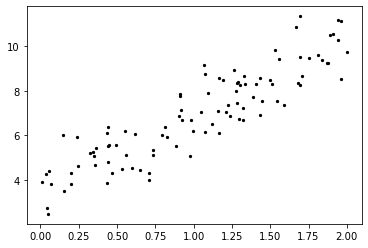

In [19]:
import numpy as np
import matplotlib.pyplot as plt


X = 2 * np.random.rand(100, 1) # Uniform distribution
y = 4 + 3 * X + np.random.randn(100, 1) # 표준정규분포

fig, sub = plt.subplots()

sub.scatter(X, y, s = 5, c = "k")

plt.show()

In [22]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

theta_best

array([[3.61988898],
       [3.2543139 ]])

In [23]:
X

array([[1.94453621],
       [1.69176016],
       [0.92012997],
       [1.43176911],
       [1.07618153],
       [0.90160559],
       [1.5425026 ],
       [1.99790686],
       [0.14794588],
       [0.15075087],
       [0.35909743],
       [1.49819559],
       [0.59678827],
       [1.23413412],
       [1.28130332],
       [1.43427897],
       [1.27527641],
       [1.88682564],
       [1.20952837],
       [0.23612377],
       [0.04811142],
       [1.22607788],
       [1.67082353],
       [0.46399746],
       [0.04378647],
       [0.24211665],
       [1.69602351],
       [0.73205149],
       [1.75436748],
       [0.97312809],
       [1.06954332],
       [1.96365468],
       [0.35175038],
       [1.16017667],
       [0.98298616],
       [0.43151833],
       [1.26450031],
       [0.70854589],
       [0.44496609],
       [0.6471479 ],
       [1.3006075 ],
       [0.43909959],
       [1.71027702],
       [1.33009732],
       [1.04721407],
       [1.09324598],
       [1.8725963 ],
       [0.794

In [24]:
X_b

array([[1.        , 1.94453621],
       [1.        , 1.69176016],
       [1.        , 0.92012997],
       [1.        , 1.43176911],
       [1.        , 1.07618153],
       [1.        , 0.90160559],
       [1.        , 1.5425026 ],
       [1.        , 1.99790686],
       [1.        , 0.14794588],
       [1.        , 0.15075087],
       [1.        , 0.35909743],
       [1.        , 1.49819559],
       [1.        , 0.59678827],
       [1.        , 1.23413412],
       [1.        , 1.28130332],
       [1.        , 1.43427897],
       [1.        , 1.27527641],
       [1.        , 1.88682564],
       [1.        , 1.20952837],
       [1.        , 0.23612377],
       [1.        , 0.04811142],
       [1.        , 1.22607788],
       [1.        , 1.67082353],
       [1.        , 0.46399746],
       [1.        , 0.04378647],
       [1.        , 0.24211665],
       [1.        , 1.69602351],
       [1.        , 0.73205149],
       [1.        , 1.75436748],
       [1.        , 0.97312809],
       [1.

In [25]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]

y_predict = X_new_b.dot(theta_best)

y_predict

array([[ 3.61988898],
       [10.12851678]])

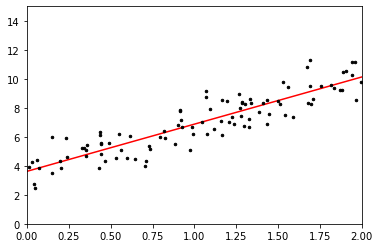

In [26]:
fig, sub = plt.subplots()

sub.plot(X_new, y_predict, "r-")
sub.plot(X, y, "k.", ms = 5)

sub.axis([0, 2, 0, 15])

plt.show()

In [27]:
from sklearn.linear_model import LinearRegression


lin_reg = LinearRegression()
lin_reg.fit(X, y)

lin_reg.intercept_, lin_reg.coef_

(array([3.61988898]), array([[3.2543139]]))

In [28]:
lin_reg.predict(X_new)

array([[ 3.61988898],
       [10.12851678]])

In [29]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond = 1e-6)

theta_best_svd # 최소제곱법

array([[3.61988898],
       [3.2543139 ]])

In [30]:
np.linalg.pinv(X_b).dot(y) # 유사역행렬로 풀었을 때

array([[3.61988898],
       [3.2543139 ]])

# 4.2. 경사 하강법


## 4.2.1. 배치 경사 하강법

* 경사 하강법의 스텝

In [31]:
eta = 0.1
n_iterations = 1000
m = 100 # 샘플 개수

theta = np.random.randn(2, 1)

for iteration in range(n_iterations):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    
    theta = theta - eta * gradients

theta

array([[3.61988898],
       [3.2543139 ]])

## 4.2.2. 확률적 경사 하강법

In [34]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m) # m보다 작은 랜덤한 숫자 하나 출력
        
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        
        theta = theta - eta * gradients

theta

array([[3.64216035],
       [3.27539763]])

In [35]:
from sklearn.linear_model import SGDRegressor


sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.1)
sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

(array([3.59352549]), array([3.27224049]))